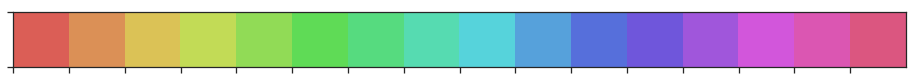

In [110]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from density import RDPlotter
from density import LineObject as dline
from peak import LineObject as pline
from peak import PeakPlotter

sns.palplot(sns.color_palette("hls", 16))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[9], 'black']
peak_colors = [colors[1], colors[8], 'black']

In [111]:
density_dir = '/projects/ps-yeolab3/bay001/maps/current/se'
peak_dir = '/projects/ps-yeolab3/bay001/maps/current/se_peak'

rbfox2_density_included = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
rbfox2_density_excluded = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
rbfox2_density_native_cass = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')
rbfox2_peak_included = os.path.join(peak_dir, '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.hist')
rbfox2_peak_excluded = os.path.join(peak_dir, '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.hist')
rbfox2_peak_native_cass = os.path.join(peak_dir, '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.HepG2-native-cassette-exons.miso.hist')

In [112]:
p=0
fc=0

peak_dir = '/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_CLIPperv2_20161120/'
peak_annotation_dir = '/projects/ps-yeolab3/bay001/maps/current_annotations/as_miso_renamed'

out_incl_hist = '/projects/ps-yeolab3/bay001/maps/test/incl.txt'# temp file
out_excl_hist = '/projects/ps-yeolab3/bay001/maps/test/excl.txt'# temp file
out_excl_hist = '/projects/ps-yeolab3/bay001/maps/test/bg.txt'# temp file

rbfox2_peak_bed = os.path.join(peak_dir, '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.bed')
peak_included_annotation = os.path.join(peak_annotation_dir, 'RBFOX2-BGHLV26-HepG2-included-upon-knockdown')
peak_excluded_annotation = os.path.join(peak_annotation_dir, 'RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown')
peak_bg_annotation = os.path.join(peak_annotation_dir, 'HepG2-native-cassette-exons.miso')

peak_incl = pline.LineObject(
    infile=rbfox2_peak_bed,
    out_hist=out_incl_hist,
    annotation=peak_included_annotation,
    l10p_cutoff=p,
    l2fc_cutoff=fc,
    hashing_val=100000,
    event_type='se',
    exon_overhang=50,
    intron_overhang=300,
    color=peak_colors[0],
    min_event_threshold=100
)

peak_excl = pline.LineObject(
    infile=rbfox2_peak_bed,
    out_hist=out_excl_hist,
    annotation=peak_excluded_annotation,
    l10p_cutoff=p,
    l2fc_cutoff=fc,
    hashing_val=100000,
    event_type='se',
    exon_overhang=50,
    intron_overhang=300,
    color=peak_colors[1],
    min_event_threshold=100
)
"""
peak_bg = pline.LineObject(
    infile=rbfox2_peak_bed,
    out_hist=out_excl_hist,
    annotation=peak_bg_annotation,
    l10p_cutoff=p,
    l2fc_cutoff=fc,
    hashing_val=100000,
    event_type='se',
    exon_overhang=50,
    intron_overhang=300,
    color='black',
    min_event_threshold=10000000
)"""

"\npeak_bg = pline.LineObject(\n    infile=rbfox2_peak_bed,\n    out_hist=out_excl_hist,\n    annotation=peak_bg_annotation,\n    l10p_cutoff=p,\n    l2fc_cutoff=fc,\n    hashing_val=100000,\n    event_type='se',\n    exon_overhang=50,\n    intron_overhang=300,\n    color='black',\n    min_event_threshold=10000000\n)"

In [113]:
density_incl = dline.LineObject(
    event_matrix=pd.read_table(rbfox2_density_included, sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=0.95,
    color=density_colors[0], # blueish
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(rbfox2_density_excluded, sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=0.95,
    color=density_colors[1], # reddish
    min_event_threshold=100
)
"""
density_bg = dline.LineObject(
    event_matrix=pd.read_table(rbfox2_density_native_cass, sep=',', index_col=0),
    annotation='Native cassettes',
    conf=0.95,
    color='black',
    min_event_threshold=100000000
)"""

((113, 1400), 'Included upon knockdown (113 events)')
((138, 1400), 'Excluded upon knockdown (138 events)')


"\ndensity_bg = dline.LineObject(\n    event_matrix=pd.read_table(rbfox2_density_native_cass, sep=',', index_col=0),\n    annotation='Native cassettes',\n    conf=0.95,\n    color='black',\n    min_event_threshold=100000000\n)"

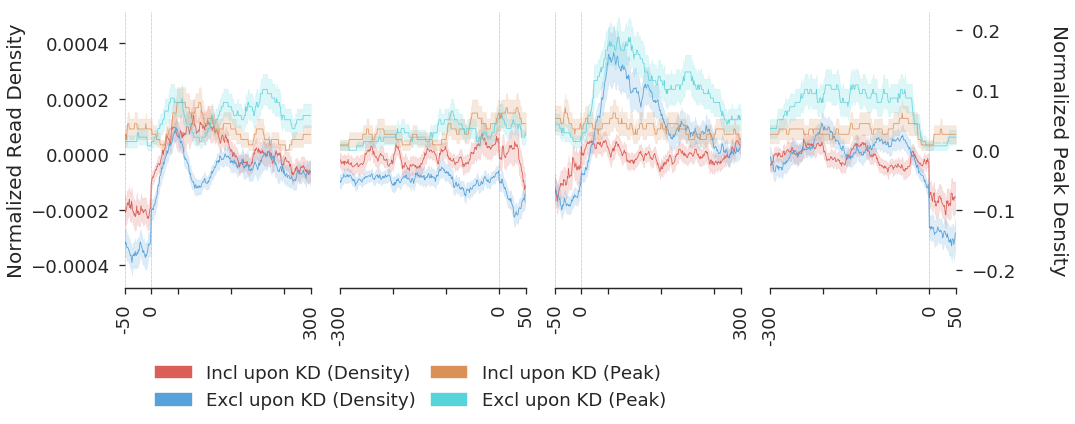

In [114]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 5))

axs = [ax1, ax2, ax3, ax4]

ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()

paxs = [ax5, ax6, ax7, ax8]


    
# ax1.set_ylim(-0.001, 0.001)

RDPlotter.plot_se([density_incl, density_excl], axs, density_colors) # density_bg
PeakPlotter.plot_se([peak_incl, peak_excl], paxs, legend=False) # peak_bg
ax1.set_ylabel("Normalized Read Density")
ax5.yaxis.set_visible(False)
ax8.yaxis.set_visible(True)
ax8.set_ylabel("Normalized Peak Density", rotation=270)
ax8.yaxis.tick_right()
ax8.yaxis.set_label_coords(1.6, 0.5) 
ax5.set_ylim(-0.23, 0.23)
ax6.set_ylim(-0.23, 0.23)
ax7.set_ylim(-0.23, 0.23)
ax8.set_ylim(-0.23, 0.23)
plt.tight_layout()

incl_peak_patch = mpatches.Patch(color=peak_colors[0], label='Incl upon KD (Peak)')
excl_peak_patch = mpatches.Patch(color=peak_colors[1], label='Excl upon KD (Peak)')
incl_density_patch = mpatches.Patch(color=density_colors[0], label='Incl upon KD (Density)')
excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excl upon KD (Density)')

leg = axs[0].legend(
    bbox_to_anchor=(1.6, -0.25), loc=1, mode="expand",
    handles=[incl_peak_patch, excl_peak_patch, incl_density_patch, excl_density_patch],
    borderaxespad=0., ncol=2
)